<a href="https://colab.research.google.com/github/ajankowi/Praca_inz/blob/master/Siec/Zlaczone_siec_4_Colab_firefox.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import sys
print(sys.version)

3.8.16 (default, Dec  7 2022, 01:12:13) 
[GCC 7.5.0]


In [2]:
#from google.colab import drive
#drive.mount("/content/drive", force_remount=True)

In [3]:
import tensorflow as tf
from tensorflow import keras
from keras import layers, models, regularizers
from keras.layers import Flatten, add, Dense, Dropout 
from keras.callbacks import ModelCheckpoint, EarlyStopping


print("TensorFlow version:", tf.__version__)
tf.keras.backend.set_floatx('float64')

TensorFlow version: 2.9.2


In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from PIL import Image
import os
import csv
import random

import cv2
import imutils
import glob
# Make NumPy printouts easier to read.
np.set_printoptions(precision=3, suppress=True)

In [5]:
#Określenie ścieżek do plików
test_zip = '/content/drive/MyDrive/Sieci/Baza_zdjec_zlaczone_2/Test.zip'
test_csv = 'test.csv'

train_zip = '/content/drive/MyDrive/Sieci/Baza_zdjec_zlaczone_2/Train.zip'
train_csv = 'train.csv'

folder = '/content/drive/MyDrive/Sieci/Baza_zdjec_zlaczone_2/'
slesh = '/'
png = '.png'

In [6]:
#!unzip '/content/drive/MyDrive/Sieci/Baza_zdjec_zlaczone_2/Train.zip' -d '/content/train/'
#!unzip '/content/drive/MyDrive/Sieci/Baza_zdjec_zlaczone_2/Test.zip' -d '/content/test/'

In [7]:
def release_list(a):
    
    del a[:]
    del a

In [8]:
#Wczytanie etykiet do treninegu 

with open(folder+train_csv,"r") as csvfile:
    lines = csvfile.readlines()
csvfile.close()

new = []

for i in lines:
    new.append(i.split(" "))

    
value_train = []
for i in new[0]:
    value_train.append(int(i))    
    
print(len(value_train))

22680


In [9]:
#Wczytanie etykiet do testowania

with open(folder+test_csv,"r") as csvfile:
    lines = csvfile.readlines()
csvfile.close()

new = []

for i in lines:
    new.append(i.split(" "))

    
value_test = []
for i in new[0]:
    value_test.append(int(i))    
    
print(len(value_test))

2520


In [10]:
#Wczytanie zdjęć treningowych (90% całego zbioru)
images_train = []
size = len(value_train)

for i in range(size):
    im = Image.open('/content/train/'+str(i)+'.png')
    arr_im = np.array(im) 
    arr_im = arr_im / 255.0
    images_train.append(arr_im) 
print(len(images_train))

22680


In [11]:
#Wczytanie zdjęć testowych (10% całego zbioru)
images_test = []
size = len(value_test)

for i in range(size):
    im = Image.open('/content/test/'+str(i)+'.png')
    arr_im = np.array(im) 
    arr_im = arr_im / 255.0
    images_test.append(arr_im) 
print(len(images_test))

2520


In [12]:
x_train = np.array(images_train)
x_test = np.array(images_test)

y_train = np.array(value_train)
y_test = np.array(value_test)

0


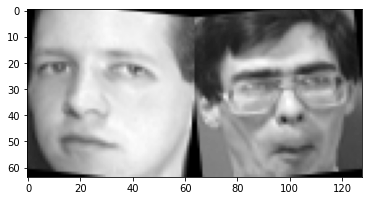

In [13]:
a = 20000

plt.imshow(x_train[a],cmap = 'gray')
print(y_train[a])

In [14]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 128, 1)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))


model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu', kernel_regularizer=keras.regularizers.l2(l=0.1)))
model.add(layers.Dense(1, activation='relu'))


In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 126, 32)       320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 61, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 30, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 28, 128)       73856     
                                                                 
 batch_normalization (BatchN  (None, 12, 28, 128)      5

In [16]:
model.compile(optimizer='adam',
              loss='mse',
              metrics=['accuracy','mse'])

#Funckja umożliwia zatrzymanie się uczenia 
#gdy wartość strat przstanie maleć
EarlyStop = EarlyStopping(monitor='val_loss',  
                          verbose=1, 
                          patience=5)


ModelCheck = ModelCheckpoint(filepath='/content/drive/MyDrive/Sieci/Zlaczone_firefox.h5',
                             monitor='val_loss',
                             save_best_only=True)


history = model.fit(x=x_train, 
                    y=y_train, 
                    epochs=100,
                    batch_size=100,
                    validation_split=0.1,
                    callbacks = [EarlyStop, ModelCheck]
                   )

Epoch 1/100
80/80 [==============================] - 55s 585ms/step - loss: 6.9421 - accuracy: 0.7195 - mse: 0.6049 - val_loss: 2.6390 - val_accuracy: 0.4497 - val_mse: 0.2346
Epoch 2/100
80/80 [==============================] - 43s 538ms/step - loss: 1.5463 - accuracy: 0.9586 - mse: 0.0458 - val_loss: 0.9382 - val_accuracy: 1.0000 - val_mse: 0.0670
Epoch 3/100
80/80 [==============================] - 43s 541ms/step - loss: 0.5973 - accuracy: 0.9794 - mse: 0.0297 - val_loss: 0.3532 - val_accuracy: 1.0000 - val_mse: 0.0045
Epoch 4/100
80/80 [==============================] - 43s 539ms/step - loss: 0.2544 - accuracy: 0.9872 - mse: 0.0224 - val_loss: 0.1483 - val_accuracy: 1.0000 - val_mse: 0.0032
Epoch 5/100
80/80 [==============================] - 43s 540ms/step - loss: 0.1229 - accuracy: 0.9891 - mse: 0.0197 - val_loss: 0.0805 - val_accuracy: 1.0000 - val_mse: 0.0015
Epoch 6/100
80/80 [==============================] - 43s 540ms/step - loss: 0.0713 - accuracy: 0.9926 - mse: 0.0162 - va

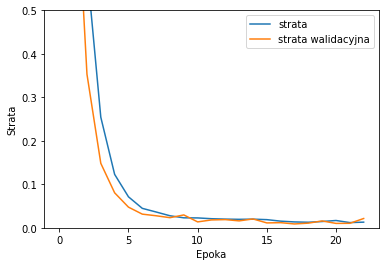

In [17]:
plt.plot(history.history['loss'], label='strata')
plt.plot(history.history['val_loss'], label = 'strata walidacyjna')
plt.xlabel('Epoka')
plt.ylabel('Strata')
plt.ylim([0.0, 0.5])
plt.legend(loc='upper right')

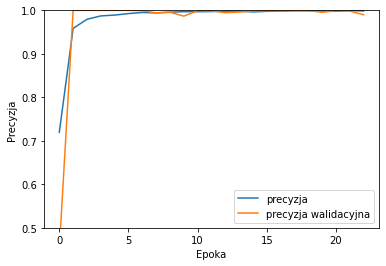

In [18]:
plt.plot(history.history['accuracy'], label='precyzja')
plt.plot(history.history['val_accuracy'], label = 'precyzja walidacyjna')
plt.xlabel('Epoka')
plt.ylabel('Precyzja')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

In [19]:
best_model = tf.keras.models.load_model('/content/drive/MyDrive/Sieci/Zlaczone_firefox.h5')


In [20]:
best_model.evaluate(x_test,  y_test, verbose=2)

79/79 - 2s - loss: 0.1586 - accuracy: 0.8266 - mse: 0.1513 - 2s/epoch - 31ms/step


[0.1586488563738538, 0.8265873015873015, 0.15127319810301992]

In [21]:
predict_x = best_model.predict(x_test) 

predictions = (predict_x > 0.5).astype("int32")

79/79 [==============================] - 2s 23ms/step


In [22]:
names = [['Tn','Nn'],['Np', 'Tp']]
names = np.reshape(names,(2,2))
print(names)

conf = tf.math.confusion_matrix(y_test,predictions)

print(conf)

[['Tn' 'Nn']
 ['Np' 'Tp']]
tf.Tensor(
[[ 829  431]
 [   6 1254]], shape=(2, 2), dtype=int32)


In [23]:
for i in range(len(x_test)):
  if predictions[i] != y_test[i]:
    print(i)

27
1217
1226
1234
1247
1252
1260
1261
1263
1265
1267
1268
1270
1275
1277
1283
1284
1291
1292
1304
1306
1307
1311
1316
1317
1324
1328
1334
1335
1344
1347
1348
1349
1350
1351
1354
1358
1359
1363
1364
1366
1369
1370
1371
1374
1377
1379
1380
1383
1384
1390
1391
1395
1397
1398
1399
1401
1404
1407
1409
1412
1413
1414
1416
1420
1421
1424
1429
1430
1431
1433
1434
1441
1446
1447
1457
1458
1463
1465
1466
1468
1471
1473
1474
1479
1485
1486
1489
1491
1499
1503
1507
1512
1513
1515
1519
1520
1522
1523
1530
1536
1537
1543
1551
1562
1564
1570
1573
1581
1582
1585
1589
1590
1592
1593
1594
1596
1598
1599
1600
1601
1602
1603
1608
1613
1615
1616
1617
1619
1621
1624
1626
1628
1631
1636
1637
1644
1646
1647
1648
1649
1650
1652
1653
1658
1659
1660
1662
1663
1672
1673
1674
1680
1684
1687
1688
1689
1691
1697
1701
1702
1703
1704
1706
1707
1723
1725
1727
1729
1734
1741
1745
1749
1751
1753
1755
1761
1762
1766
1771
1774
1777
1780
1781
1782
1785
1787
1788
1790
1793
1797
1799
1800
1801
1803
1810
1812
1816
1818
1820
18

0
[1]
[0.836]


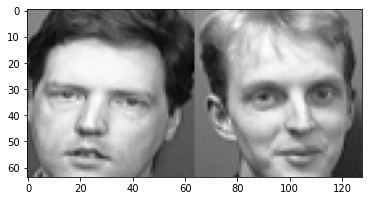

In [25]:
a = 1619

print(y_test[a])
print(predictions[a])
print(predict_x[a])

plt.imshow(x_test[a],cmap = 'gray')